In [ ]:
# Necessary installments for pandas_ta library to work...

!pip uninstall numpy -y
!pip install numpy==1.26.4  # Downgrade to a stable version
!pip uninstall pandas_ta -y
!pip install pandas_ta --no-cache-dir

# RESTART RUNTIME (Œ†ŒïŒ°ŒôŒüŒîŒüŒ£ ŒõŒïŒôŒ§ŒüŒ•Œ°ŒìŒôŒëŒ£) AFTER PANDAS_TA IS INSTALLED AND THEN RUN THE REST OF THE CELLS

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61.0/61.0 kB 434.6 kB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18.3/18.3 MB 32.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 115.1/115.1 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218910 sha256=0b988f625190f33

In [ ]:
import requests
import numpy as np
import pandas as pd
import pandas_ta as ta
from datetime import date
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Read, clean the data and calculate btc volatility & technical indicators


# Download Fear and Greed Index data
url = 'https://api.alternative.me/fng/?limit=0&format=json'
response = requests.get(url)
data = response.json()

# Parse the data
fear_greed = pd.DataFrame(data['data'])
fear_greed['timestamp'] = pd.to_datetime(fear_greed['timestamp'].astype(int), unit='s').dt.date
fear_greed.set_index('timestamp', inplace=True)
fear_greed['value'] = fear_greed['value'].astype(int)
fear_greed = fear_greed[['value']]
fear_greed.columns = ['FearGreedIndex']
fear_greed = fear_greed.rename_axis('Date')

# Clean the data
btc = pd.read_csv('/BTC-USD.csv', thousands = ',')[['Date','Price','Vol.']]
sp500 = pd.read_csv('/S&P 500.csv', thousands = ',')[['Date','Price']]
nasdaq = pd.read_csv('/NASDAQ.csv', thousands = ',')[['Date','Price']]
gold = pd.read_csv('/GOLD.csv', thousands = ',')[['Date','Price']]
dxy = pd.read_csv('/DXY.csv', thousands = ',')[['Date','Price']]
tnx = pd.read_csv('/TNX.csv', thousands = ',')[['Date','Price']]
vix = pd.read_csv('/VIX.csv', thousands = ',')[['Date','Price']]

btc['Vol.'] = btc['Vol.'].str.replace('K','').astype(float)
btc['Vol.'] = btc['Vol.']*1000

# Convert the date to datetime
btc['Date'] =  pd.to_datetime(btc['Date']).dt.date
sp500['Date'] =  pd.to_datetime(sp500['Date']).dt.date
nasdaq['Date'] =  pd.to_datetime(nasdaq['Date']).dt.date
gold['Date'] =  pd.to_datetime(gold['Date']).dt.date
dxy['Date'] =  pd.to_datetime(dxy['Date']).dt.date
tnx['Date'] =  pd.to_datetime(tnx['Date']).dt.date
vix['Date'] =  pd.to_datetime(vix['Date']).dt.date


# Set 'Date' as the index
btc.set_index('Date', inplace=True)
sp500.set_index('Date', inplace=True)
nasdaq.set_index('Date', inplace=True)
gold.set_index('Date', inplace=True)
dxy.set_index('Date', inplace=True)
tnx.set_index('Date', inplace=True)
vix.set_index('Date', inplace=True)

# Rename columns
btc.rename(columns={'Price': 'BTC', 'Vol.': 'Volume'},inplace=True)
sp500.rename(columns={'Price': 'SP500'},inplace=True)
nasdaq.rename(columns={'Price': 'NASDAQ'},inplace=True)
gold.rename(columns={'Price': 'GOLD'},inplace=True)
dxy.rename(columns={'Price': 'DXY'},inplace=True)
tnx.rename(columns={'Price': 'TNX'},inplace=True)
vix.rename(columns={'Price': 'VIX'},inplace=True)


# Start with the first DataFrame (btc) and merge the others on 'Date'
og_data = pd.merge(btc, sp500, on='Date', how='left')  # 'inner' keeps only matching dates
og_data = pd.merge(og_data, nasdaq, on='Date', how='left')
og_data = pd.merge(og_data, gold, on='Date', how='left')
og_data = pd.merge(og_data, dxy, on='Date', how='left')
og_data = pd.merge(og_data, tnx, on='Date', how='left')
og_data = pd.merge(og_data, vix, on='Date', how='left')
og_data = pd.merge(og_data, fear_greed, on='Date', how='left')

# Sort by date
og_data = og_data.sort_values(by="Date", ascending = True)

# First calculate daily returns
og_data['BTC_Volatility'] = og_data['BTC'].pct_change(fill_method=None).rolling(window=14).std()

#Calculate RSI
og_data["RSI"] = ta.rsi(og_data["BTC"], length=14)

#Calculate SMAs
og_data["SMA_50"] = ta.sma(og_data["BTC"], length=50)
og_data["SMA_100"] = ta.sma(og_data["BTC"], length=100)
og_data["SMA_200"] = ta.sma(og_data["BTC"], length=200)

#Calculate Bollinger Bands
bbands = ta.bbands(og_data["BTC"], length=20, std=2)
og_data["BB_upper"] = bbands["BBU_20_2.0"]
og_data["BB_middle"] = bbands["BBM_20_2.0"]
og_data["BB_lower"] = bbands["BBL_20_2.0"]



In [ ]:
og_data.tail(10)

BTC  Volume    SP500    NASDAQ     GOLD    DXY    TNX    VIX  \
Date                                                                           
2025-04-22  93303.0  1040.0  5287.76  18276.41  3419.40  98.92  43.89  30.57   
2025-04-23  93639.0  1300.0  5375.86  18693.26  3294.10  99.84  43.87  28.45   
2025-04-24  93940.0   340.0  5484.77  19214.40  3348.60  99.38  43.05  26.47   
2025-04-25  94702.0   710.0  5525.21  19432.56  3298.40  99.47  42.66  24.84   
2025-04-26  94693.0   310.0      NaN       NaN      NaN    NaN    NaN    NaN   
2025-04-27  93784.0   400.0      NaN       NaN      NaN    NaN    NaN    NaN   
2025-04-28  95046.0  1340.0  5528.75  19427.29  3347.70  99.01  42.16  25.15   
2025-04-29  94451.0   500.0  5560.83  19544.95  3347.60  99.24  41.73  24.17   
2025-04-30  94309.0  1140.0  5569.06  19571.02  3281.37  99.47  41.77  24.70   
2025-05-01  96367.0  1190.0  5624.73  19853.26  3228.99  99.88    NaN  24.44   

            FearGreedIndex  BTC_Volatility        RSI    SMA_50   SMA_100  \
Date                                                                        
2025-04-22            47.0        0.032402  67.361358  84306.78  90989.28   
2025-04-23            72.0        0.026210  67.803712  84430.12  90978.85   
2025-04-24            63.0        0.022838  68.219253  84491.96  90951.24   
2025-04-25            60.0        0.020380  69.299507  84583.60  90893.36   
2025-04-26            65.0        0.020143  69.269559  84737.18  90839.89   
2025-04-27            61.0        0.019380  66.159662  84883.00  90737.33   
2025-04-28            54.0        0.019423  68.288307  85166.06  90642.89   
2025-04-29            60.0        0.019143  66.174801  85480.40  90573.80   
2025-04-30            56.0        0.019310  65.652568  85703.74  90495.19   
2025-05-01            53.0        0.019640  69.419273  85953.96  90397.36   

              SMA_200      BB_upper  BB_middle      BB_lower  
Date                                                          
2025-04-22  88456.690  90421.107651   83557.20  76693.292349  
2025-04-23  88614.195  92223.514228   84079.60  75935.685772  
2025-04-24  88769.425  93789.850244   84584.55  75379.249756  
2025-04-25  88931.590  95327.118019   85139.75  74952.381981  
2025-04-26  89093.900  96460.416374   85952.35  75444.283626  
2025-04-27  89259.570  97236.347403   86682.50  76128.652597  
2025-04-28  89433.115  97640.406017   87618.20  77595.993983  
2025-04-29  89592.465  98372.894091   88213.65  78054.405909  
2025-04-30  89747.335  98619.031486   88951.45  79283.868514  
2025-05-01  89914.240  99426.954701   89601.20  79775.445299

In [ ]:
# Calculate next-day return
og_data['future_return'] = og_data['BTC'].shift(-1) / og_data['BTC'] - 1

# Define label function
def label_return(r):
    if r < -0.02:
        return 'Strong Sell'
    elif -0.02 <= r < -0.005:
        return 'Sell'
    elif -0.005 <= r <= 0.005:
        return 'Neutral'
    elif 0.005 < r <= 0.02:
        return 'Buy'
    else:
        return 'Strong Buy'

# Apply the label function
og_data['target'] = og_data['future_return'].apply(label_return)

og_data.tail(10)

BTC  Volume    SP500    NASDAQ     GOLD    DXY    TNX    VIX  \
Date                                                                           
2025-04-22  93303.0  1040.0  5287.76  18276.41  3419.40  98.92  43.89  30.57   
2025-04-23  93639.0  1300.0  5375.86  18693.26  3294.10  99.84  43.87  28.45   
2025-04-24  93940.0   340.0  5484.77  19214.40  3348.60  99.38  43.05  26.47   
2025-04-25  94702.0   710.0  5525.21  19432.56  3298.40  99.47  42.66  24.84   
2025-04-26  94693.0   310.0      NaN       NaN      NaN    NaN    NaN    NaN   
2025-04-27  93784.0   400.0      NaN       NaN      NaN    NaN    NaN    NaN   
2025-04-28  95046.0  1340.0  5528.75  19427.29  3347.70  99.01  42.16  25.15   
2025-04-29  94451.0   500.0  5560.83  19544.95  3347.60  99.24  41.73  24.17   
2025-04-30  94309.0  1140.0  5569.06  19571.02  3281.37  99.47  41.77  24.70   
2025-05-01  96367.0  1190.0  5624.73  19853.26  3228.99  99.88    NaN  24.44   

            FearGreedIndex  BTC_Volatility        RSI    SMA_50   SMA_100  \
Date                                                                        
2025-04-22            47.0        0.032402  67.361358  84306.78  90989.28   
2025-04-23            72.0        0.026210  67.803712  84430.12  90978.85   
2025-04-24            63.0        0.022838  68.219253  84491.96  90951.24   
2025-04-25            60.0        0.020380  69.299507  84583.60  90893.36   
2025-04-26            65.0        0.020143  69.269559  84737.18  90839.89   
2025-04-27            61.0        0.019380  66.159662  84883.00  90737.33   
2025-04-28            54.0        0.019423  68.288307  85166.06  90642.89   
2025-04-29            60.0        0.019143  66.174801  85480.40  90573.80   
2025-04-30            56.0        0.019310  65.652568  85703.74  90495.19   
2025-05-01            53.0        0.019640  69.419273  85953.96  90397.36   

              SMA_200      BB_upper  BB_middle      BB_lower  future_return  \
Date                                                                          
2025-04-22  88456.690  90421.107651   83557.20  76693.292349       0.003601   
2025-04-23  88614.195  92223.514228   84079.60  75935.685772       0.003214   
2025-04-24  88769.425  93789.850244   84584.55  75379.249756       0.008112   
2025-04-25  88931.590  95327.118019   85139.75  74952.381981      -0.000095   
2025-04-26  89093.900  96460.416374   85952.35  75444.283626      -0.009599   
2025-04-27  89259.570  97236.347403   86682.50  76128.652597       0.013456   
2025-04-28  89433.115  97640.406017   87618.20  77595.993983      -0.006260   
2025-04-29  89592.465  98372.894091   88213.65  78054.405909      -0.001503   
2025-04-30  89747.335  98619.031486   88951.45  79283.868514       0.021822   
2025-05-01  89914.240  99426.954701   89601.20  79775.445299            NaN   

                target  
Date                    
2025-04-22     Neutral  
2025-04-23     Neutral  
2025-04-24         Buy  
2025-04-25     Neutral  
2025-04-26        Sell  
2025-04-27         Buy  
2025-04-28        Sell  
2025-04-29     Neutral  
2025-04-30  Strong Buy  
2025-05-01  Strong Buy

In [ ]:
# Drop null values for model training

og_data2 = og_data.dropna()

og_data2.tail(10)

BTC  Volume    SP500    NASDAQ     GOLD    DXY    TNX    VIX  \
Date                                                                           
2025-04-16  84021.0   340.0  5275.70  18257.64  3346.40  99.38  42.79  32.64   
2025-04-17  84827.0   650.0  5282.70  18258.09  3328.40  99.38  43.33  29.65   
2025-04-21  87473.0   920.0  5158.20  17808.30  3425.30  98.28  44.05  33.82   
2025-04-22  93303.0  1040.0  5287.76  18276.41  3419.40  98.92  43.89  30.57   
2025-04-23  93639.0  1300.0  5375.86  18693.26  3294.10  99.84  43.87  28.45   
2025-04-24  93940.0   340.0  5484.77  19214.40  3348.60  99.38  43.05  26.47   
2025-04-25  94702.0   710.0  5525.21  19432.56  3298.40  99.47  42.66  24.84   
2025-04-28  95046.0  1340.0  5528.75  19427.29  3347.70  99.01  42.16  25.15   
2025-04-29  94451.0   500.0  5560.83  19544.95  3347.60  99.24  41.73  24.17   
2025-04-30  94309.0  1140.0  5569.06  19571.02  3281.37  99.47  41.77  24.70   

            FearGreedIndex  BTC_Volatility        RSI    SMA_50   SMA_100  \
Date                                                                        
2025-04-16            29.0        0.035733  50.875654  84338.54  91480.30   
2025-04-17            30.0        0.035751  52.450895  84345.68  91358.51   
2025-04-21            39.0        0.031391  58.082248  84170.22  91001.99   
2025-04-22            47.0        0.032402  67.361358  84306.78  90989.28   
2025-04-23            72.0        0.026210  67.803712  84430.12  90978.85   
2025-04-24            63.0        0.022838  68.219253  84491.96  90951.24   
2025-04-25            60.0        0.020380  69.299507  84583.60  90893.36   
2025-04-28            54.0        0.019423  68.288307  85166.06  90642.89   
2025-04-29            60.0        0.019143  66.174801  85480.40  90573.80   
2025-04-30            56.0        0.019310  65.652568  85703.74  90495.19   

              SMA_200      BB_upper  BB_middle      BB_lower  future_return  \
Date                                                                          
2025-04-16  87727.490  87203.441119   82578.75  77954.058881       0.009593   
2025-04-17  87822.815  87239.314218   82591.45  77943.585782      -0.005470   
2025-04-21  88301.130  88229.669215   83016.70  77803.730785       0.066649   
2025-04-22  88456.690  90421.107651   83557.20  76693.292349       0.003601   
2025-04-23  88614.195  92223.514228   84079.60  75935.685772       0.003214   
2025-04-24  88769.425  93789.850244   84584.55  75379.249756       0.008112   
2025-04-25  88931.590  95327.118019   85139.75  74952.381981      -0.000095   
2025-04-28  89433.115  97640.406017   87618.20  77595.993983      -0.006260   
2025-04-29  89592.465  98372.894091   88213.65  78054.405909      -0.001503   
2025-04-30  89747.335  98619.031486   88951.45  79283.868514       0.021822   

                target  
Date                    
2025-04-16         Buy  
2025-04-17        Sell  
2025-04-21  Strong Buy  
2025-04-22     Neutral  
2025-04-23     Neutral  
2025-04-24         Buy  
2025-04-25     Neutral  
2025-04-28        Sell  
2025-04-29     Neutral  
2025-04-30  Strong Buy

In [ ]:
# Selecting relevant features from the original dataset 'og_data2'
# These include market indices, technical indicators, sentiment measures, and BTC-specific indicators

X = og_data2[
        [
        'Volume', 'SP500', 'NASDAQ', 'GOLD', 'DXY', 'TNX', 'VIX', 'FearGreedIndex', 'BTC_Volatility',

        'RSI','SMA_50', 'SMA_100', 'SMA_200', 'BB_upper', 'BB_middle', 'BB_lower'

        ]]

# Encoding the target variable ('target') to numeric form (e.g., 0/1 or 0/1/2, depending on classes)
le = LabelEncoder()
y = le.fit_transform(og_data2['target'])


# Splitting the dataset into training and testing sets
# shuffle=False is used to preserve any time-series nature in the data
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Standardizing the feature values (mean = 0, std = 1) to improve model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing and training a Random Forest Classifier
# n_estimators=100: use 100 decision trees
# max_depth=50: limit tree depth to reduce overfitting
# random_state=42: ensures reproducibility
model = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, random_state=42)

              precision    recall  f1-score   support

         Buy       0.23      0.04      0.07        72
     Neutral       0.25      0.52      0.34        84
        Sell       0.24      0.29      0.27        79
  Strong Buy       0.32      0.10      0.15        70
 Strong Sell       0.27      0.26      0.27        57

    accuracy                           0.25       362
   macro avg       0.26      0.24      0.22       362
weighted avg       0.26      0.25      0.22       362



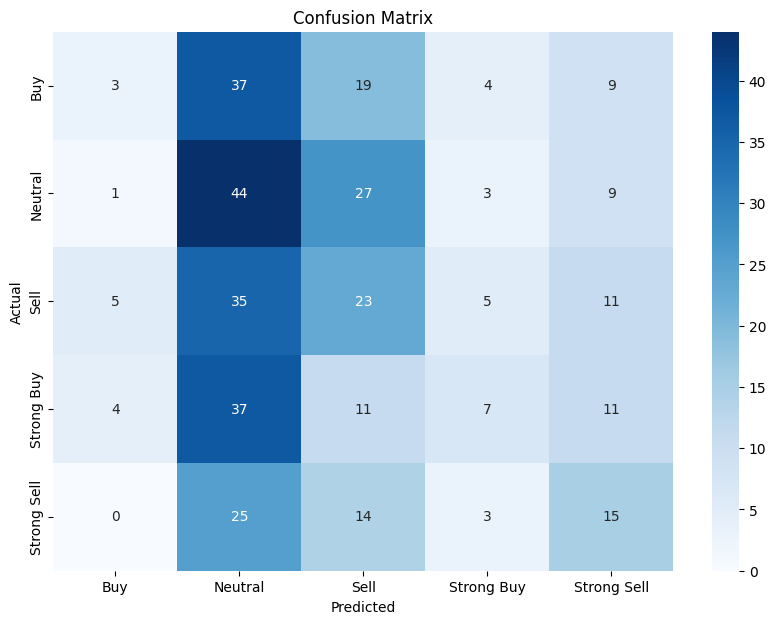

In [ ]:
y_pred = model.predict(X_test)

# Decode predictions and true values
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

# Print classification report
print(classification_report(y_test_labels, y_pred_labels))

# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Select the latest available feature row
latest_data = og_data2[[
    'Volume', 'SP500', 'NASDAQ', 'GOLD', 'DXY', 'TNX', 'VIX', 'FearGreedIndex', 'BTC_Volatility',
    'RSI','SMA_50', 'SMA_100', 'SMA_200', 'BB_upper', 'BB_middle', 'BB_lower'
]].iloc[-1]

# Scale the latest input
latest_data_scaled = scaler.transform([latest_data])

# Make prediction
prediction = model.predict(latest_data_scaled)
predicted_label = le.inverse_transform(prediction)[0]

print(f"üìà Predicted next-day signal: {predicted_label}")


üìà Predicted next-day signal: Sell


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


target
Buy            0.198562
Neutral        0.207412
Sell           0.191372
Strong Buy     0.212389
Strong Sell    0.190265
Name: proportion, dtype: float64


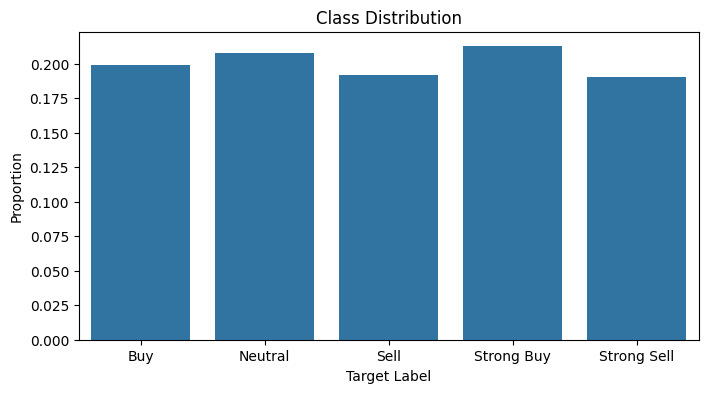

In [ ]:
# Plot Actual Class Distribution

class_counts = og_data2['target'].value_counts(normalize=True).sort_index()
print(class_counts)


plt.figure(figsize=(8, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution")
plt.ylabel("Proportion")
plt.xlabel("Target Label")
plt.show()


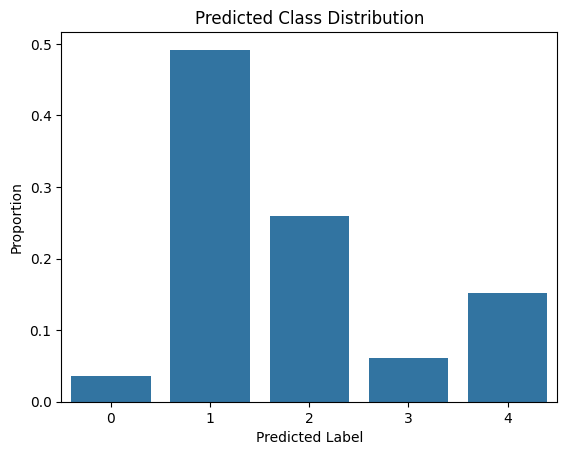

In [ ]:
from collections import Counter

# Plot predicted class distribution

pred_counts = pd.Series(y_pred).value_counts(normalize=True).sort_index()

sns.barplot(x=pred_counts.index, y=pred_counts.values)
plt.title("Predicted Class Distribution")
plt.ylabel("Proportion")
plt.xlabel("Predicted Label")
plt.show()
